# Camp QMIND Intro Hackathon - Titanic Survival Prediction

Import relevant libraries and packages 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in train and test data

In [17]:
df_train = pd.read_csv('titanic_train.csv') # reading train data into "df_train"
df_test = pd.read_csv('titanic_test.csv') # reading test data into "df_test"

Inspect the training dataset

In [28]:
df_train.head(10) # print the first 10 rows of the training set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
1,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
2,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
3,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
4,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
5,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
6,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
7,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
8,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
9,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q


In [26]:
df_train.shape # print the number of rows and columns in the training set

(711, 12)

In [27]:
df_train.columns # print column names for training set

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
df_train.describe() # statistical summary of training dataset columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,711.000000,711.000000,711.000000,560.000000,711.000000,711.000000,711.000000
mean,452.794655,0.375527,2.298172,30.093161,0.510549,0.368495,31.886409
std,257.314342,0.484600,0.836481,14.362382,1.108019,0.806186,47.859701
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,237.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,454.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,670.500000,1.000000,3.000000,39.000000,1.000000,0.000000,30.695800
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df_train.isnull().sum() # print the number of null values in each column of the training dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            151
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         1
dtype: int64

Inspect the test dataset

In [34]:
df_test.head(10) # print the first 10 rows of the test set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
1,357,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S
2,753,3,"Vande Velde, Mr. Johannes Joseph",male,33.0,0,0,345780,9.5000,NaN,S
3,123,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
4,169,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
5,495,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,NaN,S
6,96,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
7,444,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
8,703,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,NaN,C
9,713,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S


In [33]:
df_test.shape # print the number of rows and columns in the test set

(180, 11)

In [35]:
df_test.columns # print column names for test set (*NOTE: there is no 'Survived' column in this dataset, since this is what YOU must predict)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
df_test.describe() # statistical summary of test dataset columns

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,180.000000,180.000000,154.000000,180.000000,180.000000,180.000000
mean,419.161111,2.350000,28.266234,0.572222,0.433333,33.459514
std,256.464252,0.835491,15.069357,1.083294,0.805706,56.487116
min,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,194.000000,2.000000,18.000000,0.000000,0.000000,7.895800
50%,426.000000,3.000000,25.500000,0.000000,0.000000,14.454200
75%,653.500000,3.000000,35.750000,1.000000,1.000000,31.387500
max,867.000000,3.000000,71.000000,5.000000,5.000000,512.329200


In [37]:
df_test.isnull().sum() # print the number of null values in each column of the test dataset

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             26
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          138
Embarked         1
dtype: int64

Perform some data visualization to further inspect the train data

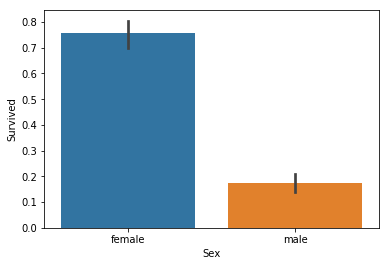

In [41]:
sns.barplot(x='Sex', y='Survived', data=df_train) # likelyhood of survival based on gender

Data cleaning and feature engineering

Train test split

Build and evaluate model

In [ ]:
# Generate predictions using your model

prediction = MODEL_NAME.predict(x_test) #MAKE SURE TO CHANGE THE MODEL NAME TO WHATEVER MODEL YOU ARE USING

Submit predictions

In [ ]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred})

submit.to_csv('./titanic_submission_group-#.csv',index = False)